In [12]:
query = """
with districts_short as (
    select id, ratio_urban_inhabitants, avg_salary,
           coalesce(unemployment_96, unemployment_95) as unemployment,
           cast(coalesce(crimes_96, crimes_95) as real) / no_inhabitants as crimes from districts
), t as (
    select account_id, count(*) transaction_count, avg(amount) transaction_avg_amount, min(balance) transaction_min_balance,
           max(balance) transaction_max_balance, avg(balance) transaction_avg_balance
    from transactions
    group by account_id
)
select l.date loan_date, l.amount loan_amount, l.duration loan_duration , l.payments loan_payments,
       a.date account_creation, t.transaction_count, t.transaction_avg_amount, t.transaction_min_balance,
       t.transaction_max_balance, t.transaction_avg_balance,
       d.ratio_urban_inhabitants, d.avg_salary, d.unemployment, d.crimes,
       c2.birthday as client_birthday, l.status as loan_status
from loans l
    left join accounts a on l.account_id = a.id
    left join t on t.account_id = a.id
    left join districts_short d on a.district_id = d.id
left join dispositions d2 on a.id = d2.account_id
left join clients c2 on d2.client_id = c2.id
"""

In [13]:
import pandas as pd
import sqlite3

train_dataset = None

with sqlite3.connect("./database_train.db") as db:
    train_dataset = pd.read_sql_query(sql = query, con = db)
    
train_dataset

,loan_date,loan_amount,loan_duration,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,client_birthday,loan_status
0,940105,80952,24,3373,930226,54,7954.257407,1100.0,67529.6,32590.624074,100.0,12541,0.43,0.082250,450204,1
1,940105,80952,24,3373,930226,54,7954.257407,1100.0,67529.6,32590.624074,100.0,12541,0.43,0.082250,401009,1
2,960429,30276,12,2523,950407,80,5856.300000,715.0,58157.5,25197.092500,67.0,9104,2.07,0.022778,390423,-1
3,960502,165960,24,6915,941019,125,12822.353600,700.0,107069.6,52523.244800,56.9,8427,1.54,0.020366,440613,1
4,961106,88440,12,7370,960511,31,14850.767742,200.0,103239.0,62778.090323,85.3,9317,7.07,0.053638,450703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,930915,52788,12,4399,930114,43,3714.897674,1000.0,41469.1,22198.179070,51.9,9045,3.60,0.031958,730216,1
399,951029,419880,60,6998,950526,18,24426.472222,200.0,104039.9,59352.833333,100.0,12541,0.43,0.082250,451030,1
400,951029,419880,60,6998,950526,18,24426.472222,200.0,104039.9,59352.833333,100.0,12541,0.43,0.082250,430406,1
401,960806,54024,12,4502,941001,147,8708.722449,1000.0,81705.8,36480.185034,53.8,8814,5.74,0.017464,680413,1


In [ ]:
# # Data Cleaning

# # Convert empty k_symbol to None
# for index in range(len(train_dataset.k_symbol)):
#     if train_dataset.k_symbol[index] == " ":
#         train_dataset.k_symbol[index] = None


# interpolated = train_dataset.interpolate(method ='pad')

# # Search for None Operations
# lines_to_drop = set([])
# for index in range(len(interpolated.operation)):
#     if interpolated.operation[index] == None:
#         lines_to_drop.add(index)

# cleaned_interpolated = interpolated.drop(list(lines_to_drop).copy(), axis=0)
# cleaned_interpolated

In [14]:
# Standarization

from sklearn.preprocessing import StandardScaler

# Everything except loan_duration, loan_status
features_to_standardize = ["loan_date", "loan_amount", "loan_payments", "account_creation", "transaction_count", "transaction_avg_amount",	"transaction_min_balance", "transaction_max_balance", "transaction_avg_balance", "ratio_urban_inhabitants", "avg_salary", "unemployment", "crimes", "client_birthday"]
train_dataset_to_scale = train_dataset[features_to_standardize]

# Scaler
scaler = StandardScaler()
scaled_train_dataset = pd.DataFrame(scaler.fit_transform(train_dataset_to_scale), columns = train_dataset_to_scale.columns)

scaled_train_dataset

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,client_birthday
0,-1.067213,-0.623915,-0.369372,-0.984238,-0.480065,-0.375793,0.411764,-0.612234,-0.824321,1.529519,2.167274,-1.380556,2.144274,-1.096677
1,-1.067213,-0.623915,-0.369372,-0.984238,-0.480065,-0.375793,0.411764,-0.612234,-0.824321,1.529519,2.167274,-1.380556,2.144274,-1.478753
2,1.092591,-1.099355,-0.753491,0.936640,0.104086,-0.871597,0.056068,-0.885555,-1.381521,-0.075730,-0.356871,-0.634027,-0.755465,-1.560970
3,1.100348,0.173627,1.231274,0.043067,1.115116,0.774669,0.042210,0.540882,0.677865,-0.567033,-0.854062,-0.875283,-0.873051,-1.171166
4,1.164535,-0.553663,1.436891,1.898364,-0.996814,1.254038,-0.419733,0.429170,1.450703,0.814453,-0.200443,1.641974,0.749228,-1.092802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,-2.043822,-0.888148,0.094282,-0.994898,-0.727206,-1.377668,0.319376,-1.372244,-1.607529,-0.810253,-0.400201,0.062429,-0.307851,1.078052
399,0.093666,2.555893,1.268782,0.947967,-1.288889,3.517035,-0.419733,0.452526,1.192565,1.529519,2.167274,-1.380556,2.144274,-1.090262
400,0.093666,2.555893,1.268782,0.947967,-1.288889,3.517035,-0.419733,0.452526,1.192565,1.529519,2.167274,-1.380556,2.144274,-1.250440
401,1.132654,-0.876552,0.140828,0.041354,1.609397,-0.197493,0.319376,-0.198809,-0.531191,-0.717829,-0.569848,1.036558,-1.014528,0.691254


In [15]:
# Remove outliers from scaled_train_dataset

lines_to_drop = set([])
for column in scaled_train_dataset.columns:
    for line_number in range(len(scaled_train_dataset[column])):
        value = scaled_train_dataset[column][line_number]
        if value > 3.0 or value < -3.0:
            lines_to_drop.add(line_number)


no_outliers_scaled_train_dataset = scaled_train_dataset.drop(list(lines_to_drop).copy(), axis=0)
no_outliers_train_dataset = train_dataset.drop(list(lines_to_drop).copy(), axis=0)

no_outliers_scaled_train_dataset = no_outliers_scaled_train_dataset.reset_index()
no_outliers_scaled_train_dataset = no_outliers_scaled_train_dataset.drop(['index'], axis=1)
no_outliers_scaled_train_dataset

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,client_birthday
0,-1.067213,-0.623915,-0.369372,-0.984238,-0.480065,-0.375793,0.411764,-0.612234,-0.824321,1.529519,2.167274,-1.380556,2.144274,-1.096677
1,-1.067213,-0.623915,-0.369372,-0.984238,-0.480065,-0.375793,0.411764,-0.612234,-0.824321,1.529519,2.167274,-1.380556,2.144274,-1.478753
2,1.092591,-1.099355,-0.753491,0.936640,0.104086,-0.871597,0.056068,-0.885555,-1.381521,-0.075730,-0.356871,-0.634027,-0.755465,-1.560970
3,1.100348,0.173627,1.231274,0.043067,1.115116,0.774669,0.042210,0.540882,0.677865,-0.567033,-0.854062,-0.875283,-0.873051,-1.171166
4,1.164535,-0.553663,1.436891,1.898364,-0.996814,1.254038,-0.419733,0.429170,1.450703,0.814453,-0.200443,1.641974,0.749228,-1.092802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,1.153483,2.298640,1.062262,0.053061,1.519528,0.788889,0.226987,0.798797,1.025176,-0.513525,-0.613912,0.385621,-0.117694,1.628677
385,1.153483,2.298640,1.062262,0.053061,1.519528,0.788889,0.226987,0.798797,1.025176,-0.513525,-0.613912,0.385621,-0.117694,1.547959
386,-2.043822,-0.888148,0.094282,-0.994898,-0.727206,-1.377668,0.319376,-1.372244,-1.607529,-0.810253,-0.400201,0.062429,-0.307851,1.078052
387,1.132654,-0.876552,0.140828,0.041354,1.609397,-0.197493,0.319376,-0.198809,-0.531191,-0.717829,-0.569848,1.036558,-1.014528,0.691254


In [16]:
# Binarization
from sklearn.preprocessing import Binarizer

train_dataset_to_binarize = no_outliers_train_dataset[["loan_status"]]

# 0 <==> loan_status = -1
# 1 <==> loan_status = 1
binarizer = Binarizer()
binarized_train_data_set = pd.DataFrame(binarizer.fit_transform(train_dataset_to_binarize), columns = train_dataset_to_binarize.columns)

binarized_train_data_set

,loan_status
0,1
1,1
2,0
3,1
4,1
...,...
384,1
385,1
386,1
387,1


In [18]:
# One-hot encoder

from sklearn.preprocessing import OneHotEncoder

col_names_to_encode = ["loan_duration"]
train_dataset_to_hotencode = no_outliers_train_dataset[col_names_to_encode]

encoder = OneHotEncoder(sparse=False)
res = encoder.fit(train_dataset_to_hotencode)

columns = []
for index, column_name in enumerate(col_names_to_encode):
    columns = columns + [f"is_{column_name}_{val}" for val in res.categories_[index]]

hot_encoded_train_dataset = pd.DataFrame(res.transform(train_dataset_to_hotencode), columns = columns)

hot_encoded_train_dataset

,is_loan_duration_12,is_loan_duration_24,is_loan_duration_36,is_loan_duration_48,is_loan_duration_60
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
384,0.0,0.0,0.0,0.0,1.0
385,0.0,0.0,0.0,0.0,1.0
386,1.0,0.0,0.0,0.0,0.0
387,1.0,0.0,0.0,0.0,0.0


In [20]:
# Recreate train_dataset after preprocessing

pre_processed_dataframe = no_outliers_scaled_train_dataset

pre_processed_dataframe["loan_status"] = binarized_train_data_set.values

for column_name in hot_encoded_train_dataset.columns:
    pre_processed_dataframe[column_name] = hot_encoded_train_dataset[column_name]

pre_processed_dataframe

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,client_birthday,loan_status,is_loan_duration_12,is_loan_duration_24,is_loan_duration_36,is_loan_duration_48,is_loan_duration_60
0,-1.067213,-0.623915,-0.369372,-0.984238,-0.480065,-0.375793,0.411764,-0.612234,-0.824321,1.529519,2.167274,-1.380556,2.144274,-1.096677,1,0.0,1.0,0.0,0.0,0.0
1,-1.067213,-0.623915,-0.369372,-0.984238,-0.480065,-0.375793,0.411764,-0.612234,-0.824321,1.529519,2.167274,-1.380556,2.144274,-1.478753,1,0.0,1.0,0.0,0.0,0.0
2,1.092591,-1.099355,-0.753491,0.936640,0.104086,-0.871597,0.056068,-0.885555,-1.381521,-0.075730,-0.356871,-0.634027,-0.755465,-1.560970,0,1.0,0.0,0.0,0.0,0.0
3,1.100348,0.173627,1.231274,0.043067,1.115116,0.774669,0.042210,0.540882,0.677865,-0.567033,-0.854062,-0.875283,-0.873051,-1.171166,1,0.0,1.0,0.0,0.0,0.0
4,1.164535,-0.553663,1.436891,1.898364,-0.996814,1.254038,-0.419733,0.429170,1.450703,0.814453,-0.200443,1.641974,0.749228,-1.092802,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,1.153483,2.298640,1.062262,0.053061,1.519528,0.788889,0.226987,0.798797,1.025176,-0.513525,-0.613912,0.385621,-0.117694,1.628677,1,0.0,0.0,0.0,0.0,1.0
385,1.153483,2.298640,1.062262,0.053061,1.519528,0.788889,0.226987,0.798797,1.025176,-0.513525,-0.613912,0.385621,-0.117694,1.547959,1,0.0,0.0,0.0,0.0,1.0
386,-2.043822,-0.888148,0.094282,-0.994898,-0.727206,-1.377668,0.319376,-1.372244,-1.607529,-0.810253,-0.400201,0.062429,-0.307851,1.078052,1,1.0,0.0,0.0,0.0,0.0
387,1.132654,-0.876552,0.140828,0.041354,1.609397,-0.197493,0.319376,-0.198809,-0.531191,-0.717829,-0.569848,1.036558,-1.014528,0.691254,1,1.0,0.0,0.0,0.0,0.0


In [21]:
#Remove Redundant (Duplicates)

pre_processed_dataframe = pre_processed_dataframe.drop_duplicates()
pre_processed_dataframe

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,client_birthday,loan_status,is_loan_duration_12,is_loan_duration_24,is_loan_duration_36,is_loan_duration_48,is_loan_duration_60
0,-1.067213,-0.623915,-0.369372,-0.984238,-0.480065,-0.375793,0.411764,-0.612234,-0.824321,1.529519,2.167274,-1.380556,2.144274,-1.096677,1,0.0,1.0,0.0,0.0,0.0
1,-1.067213,-0.623915,-0.369372,-0.984238,-0.480065,-0.375793,0.411764,-0.612234,-0.824321,1.529519,2.167274,-1.380556,2.144274,-1.478753,1,0.0,1.0,0.0,0.0,0.0
2,1.092591,-1.099355,-0.753491,0.936640,0.104086,-0.871597,0.056068,-0.885555,-1.381521,-0.075730,-0.356871,-0.634027,-0.755465,-1.560970,0,1.0,0.0,0.0,0.0,0.0
3,1.100348,0.173627,1.231274,0.043067,1.115116,0.774669,0.042210,0.540882,0.677865,-0.567033,-0.854062,-0.875283,-0.873051,-1.171166,1,0.0,1.0,0.0,0.0,0.0
4,1.164535,-0.553663,1.436891,1.898364,-0.996814,1.254038,-0.419733,0.429170,1.450703,0.814453,-0.200443,1.641974,0.749228,-1.092802,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,1.153483,2.298640,1.062262,0.053061,1.519528,0.788889,0.226987,0.798797,1.025176,-0.513525,-0.613912,0.385621,-0.117694,1.628677,1,0.0,0.0,0.0,0.0,1.0
385,1.153483,2.298640,1.062262,0.053061,1.519528,0.788889,0.226987,0.798797,1.025176,-0.513525,-0.613912,0.385621,-0.117694,1.547959,1,0.0,0.0,0.0,0.0,1.0
386,-2.043822,-0.888148,0.094282,-0.994898,-0.727206,-1.377668,0.319376,-1.372244,-1.607529,-0.810253,-0.400201,0.062429,-0.307851,1.078052,1,1.0,0.0,0.0,0.0,0.0
387,1.132654,-0.876552,0.140828,0.041354,1.609397,-0.197493,0.319376,-0.198809,-0.531191,-0.717829,-0.569848,1.036558,-1.014528,0.691254,1,1.0,0.0,0.0,0.0,0.0


In [7]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Binarizer
# from sklearn.preprocessing import OneHotEncoder

# def pre_process_dataset(dataset, is_test_dataset):
#     # Standarization

#     # Everything except loan_duration, loan_status
#     features_to_standardize = ["loan_date", "loan_amount", "loan_payments", "account_creation", "transaction_count", "transaction_avg_amount", "transaction_min_balance", "transaction_max_balance", "transaction_avg_balance"]
#     dataset_to_scale = dataset[features_to_standardize]

#     scaler = StandardScaler()
#     scaled_dataset = pd.DataFrame(scaler.fit_transform(dataset_to_scale), columns = dataset_to_scale.columns)

#     # Binarization
#     if not is_test_dataset:
#         dataset_to_binarize = dataset[["loan_status"]]

#         # 0 <==> loan_status = -1
#         # 1 <==> loan_status = 1
#         binarizer = Binarizer()
#         binarized_data_set = pd.DataFrame(binarizer.fit_transform(dataset_to_binarize), columns = dataset_to_binarize.columns)

#     # One-hot encoder
#     dataset_to_hotencode = dataset[["loan_duration"]]

#     encoder = OneHotEncoder(sparse=False)
#     res = encoder.fit(dataset_to_hotencode)

#     column_names = [f"is_loan_duration {duration_val}" for duration_val in res.categories_[0]]

#     hot_encoded_dataset = pd.DataFrame(res.transform(dataset_to_hotencode), columns = column_names)

#     # Recreate dataset after preprocessing
#     pre_processed_dataframe = scaled_dataset
#     for column_name in hot_encoded_dataset.columns:
#         pre_processed_dataframe[column_name] = hot_encoded_dataset[column_name]

#     if not is_test_dataset:
#         pre_processed_dataframe["loan_status"] = binarized_data_set.values

#     return pre_processed_dataframe
    

In [22]:
# pre_processed_dataframe = pre_process_dataset(train_dataset, False)
pre_processed_features = pre_processed_dataframe.drop("loan_status", axis=1)
pre_processed_labels = pre_processed_dataframe.loan_status

In [23]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=19, sampling_strategy="auto")
features_res, labels_res = smt.fit_resample(pre_processed_features, pre_processed_labels)

In [24]:
from  sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_res, labels_res, random_state=19)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def watch_random_forest_overfit(x_train, x_test, y_train, y_test):
    train_scores = []
    test_scores = []

    estimators = []
    # scores = []
    classifiers = []
    technique = []

    for estimator in range(1, 50):
        rf = RandomForestClassifier(n_estimators= estimator, random_state = 19)
        rf.fit(x_train, y_train)

        # Evaluate train
        train_yhat = rf.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)

        # Evaluate test
        test_yhat = rf.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)

        estimators.append(estimator)
        # scores.append(rf.score(x_test, y_test))
        classifiers.append(rf)
        technique.append("random forest")

    pyplot.plot(estimators, train_scores, '-o', label='Train')
    pyplot.plot(estimators, test_scores, '-o', label='Test')
    pyplot.legend()
    pyplot.show()

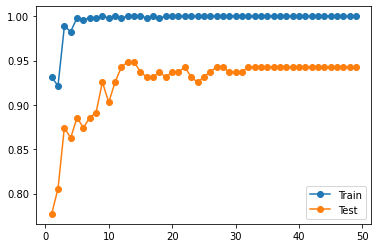

In [26]:
watch_random_forest_overfit(x_train, x_test, y_train, y_test)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def watch_kneighbors_overfit(x_train, x_test, y_train, y_test):
    neighbors = []
    classifiers = []

    train_scores = []
    test_scores = []

    for neighbor in range(1,50):
        kn = KNeighborsClassifier(n_neighbors=neighbor)
        kn.fit(x_train, y_train)

        # Evaluate train
        train_yhat = kn.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)

        # Evaluate test
        test_yhat = kn.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)

        neighbors.append(neighbor)
        classifiers.append(kn)
    
    pyplot.plot(neighbors, train_scores, '-o', label='Train')
    pyplot.plot(neighbors, test_scores, '-o', label='Test')
    pyplot.legend()
    pyplot.show()

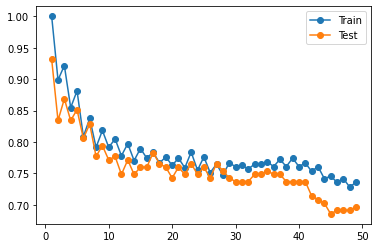

In [28]:
watch_kneighbors_overfit(x_train, x_test, y_train, y_test)

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# !!! No more convergence warnings
simplefilter("ignore", category=ConvergenceWarning)

shapes = []
activations = []
learn_rates = []
# scores = []
classifiers = []
technique = []

def watch_overfit_mlp(x_train, x_test, y_train, y_test): 
    for activation in ["logistic", "tanh", "relu"]:
        print(f"Activation = {activation}")

        for learn_rate in ["constant", "invscaling", "adaptive"]:
            print(f"Learn Rate = {learn_rate}")

            for n_layers in range(1, 6):
                print(f"# Layers = {n_layers}")

                train_scores = []
                test_scores = []
                layer_sizes = []

                for layer_size in range(4, 20):
                    shape = tuple(layer_size for _ in range(n_layers))
                    shapes.append(shape)
                    activations.append(activation)
                    learn_rates.append(learn_rate)
                    layer_sizes.append(layer_size)

                    nn = MLPClassifier(hidden_layer_sizes=shape, activation=activation, learning_rate=learn_rate, random_state=19)
                    nn.fit(x_train, y_train)

                    # Evaluate train
                    train_yhat = nn.predict(x_train)
                    train_acc = accuracy_score(y_train, train_yhat)
                    train_scores.append(train_acc)

                    # Evaluate test
                    test_yhat = nn.predict(x_test)
                    test_acc = accuracy_score(y_test, test_yhat)
                    test_scores.append(test_acc)

                    classifiers.append(nn)
                    technique.append("Multi Layer Perceptron")
                    # scores.append(nn.score(x_test, y_test))

                pyplot.plot(layer_sizes, train_scores, '-o', label='Train')
                pyplot.plot(layer_sizes, test_scores, '-o', label='Test')
                pyplot.legend()
                pyplot.show()
    

Activation = logistic
Learn Rate = constant
# Layers = 1


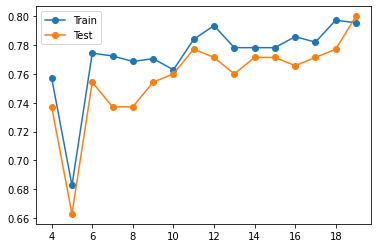

# Layers = 2


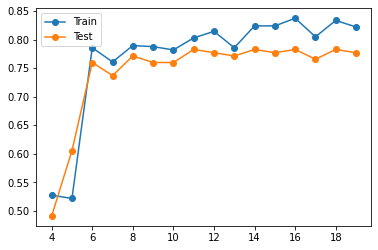

# Layers = 3


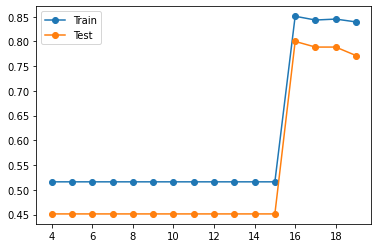

# Layers = 4


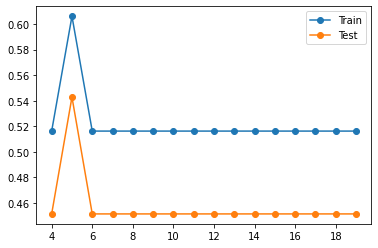

# Layers = 5


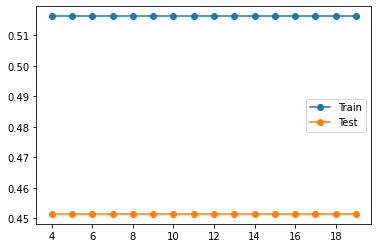

Learn Rate = invscaling
# Layers = 1


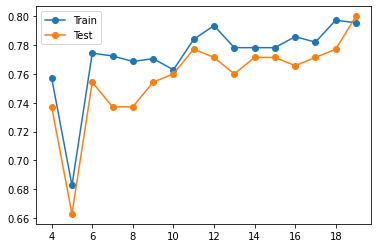

# Layers = 2


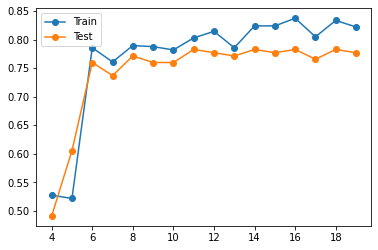

# Layers = 3


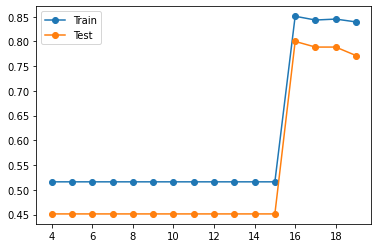

# Layers = 4


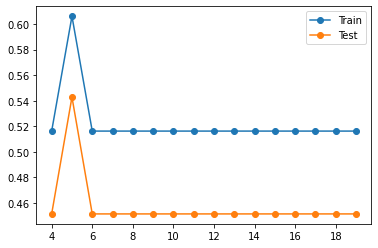

# Layers = 5


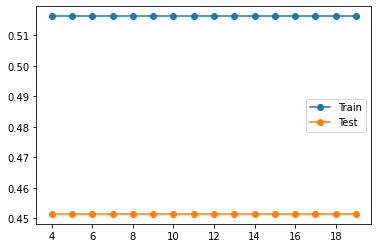

Learn Rate = adaptive
# Layers = 1


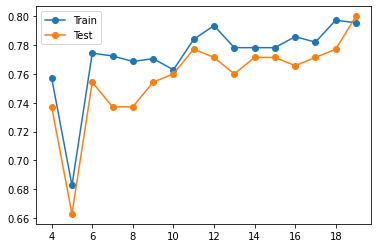

# Layers = 2


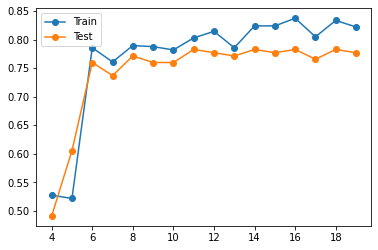

# Layers = 3


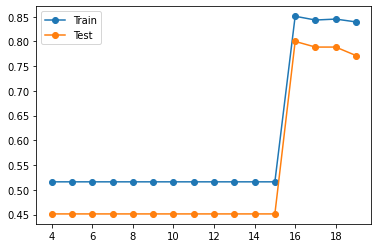

# Layers = 4


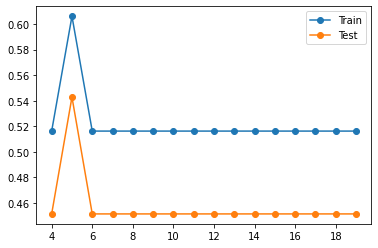

# Layers = 5


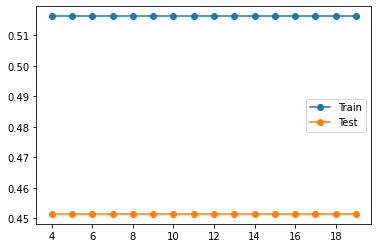

Activation = tanh
Learn Rate = constant
# Layers = 1


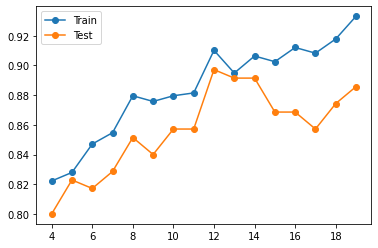

# Layers = 2


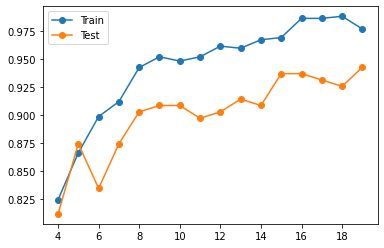

# Layers = 3


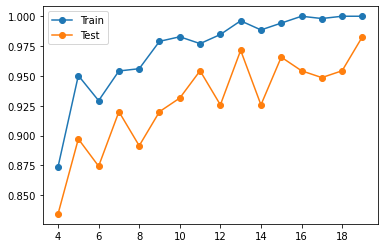

# Layers = 4


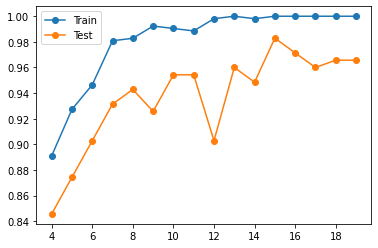

# Layers = 5


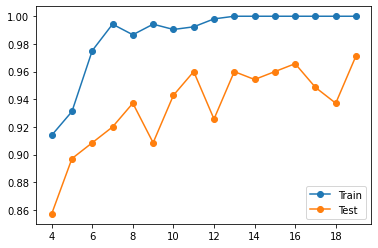

Learn Rate = invscaling
# Layers = 1


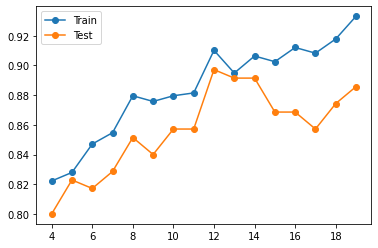

# Layers = 2


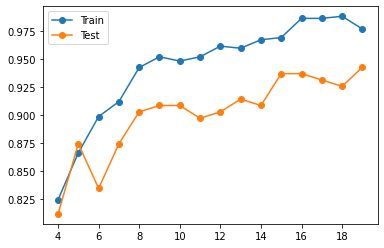

# Layers = 3


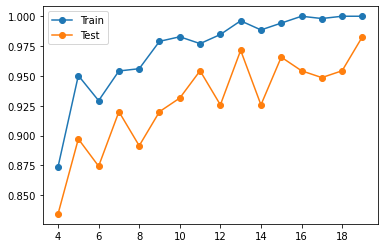

# Layers = 4


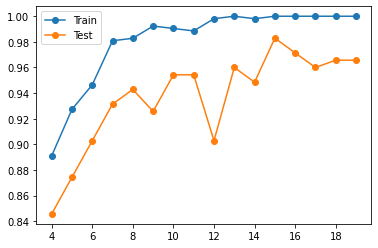

# Layers = 5


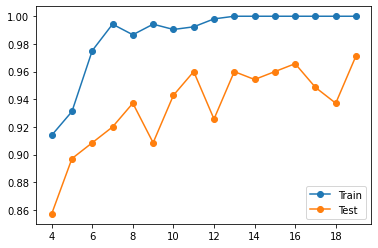

Learn Rate = adaptive
# Layers = 1


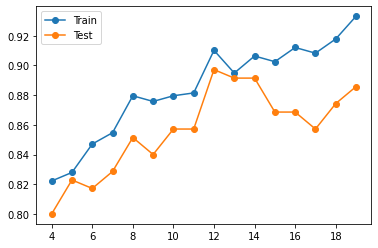

# Layers = 2


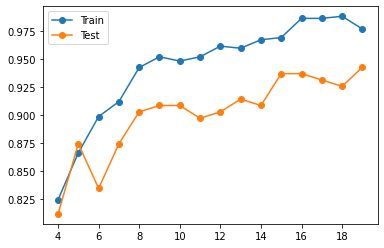

# Layers = 3


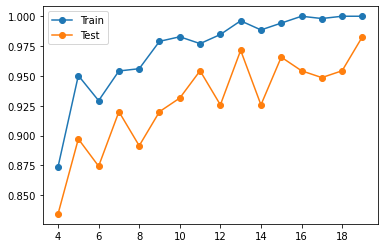

# Layers = 4


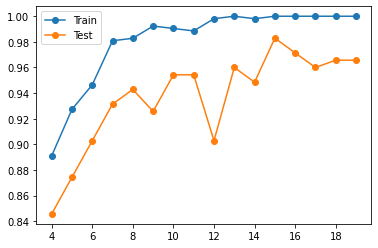

# Layers = 5


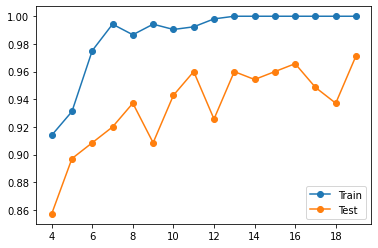

Activation = relu
Learn Rate = constant
# Layers = 1


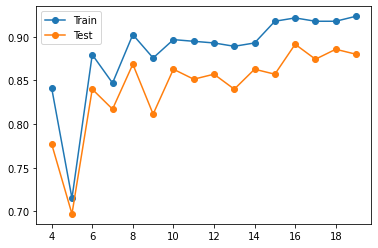

# Layers = 2


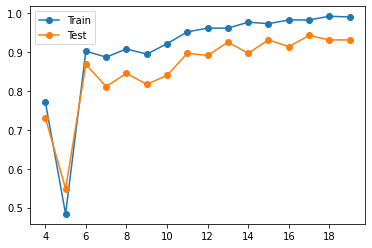

# Layers = 3


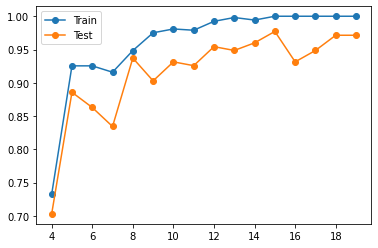

# Layers = 4


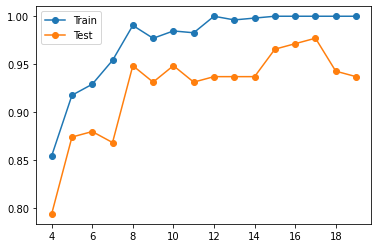

# Layers = 5


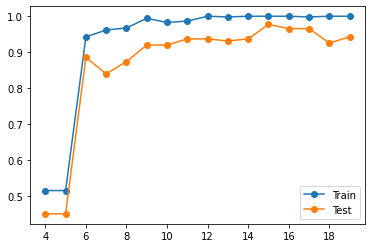

Learn Rate = invscaling
# Layers = 1


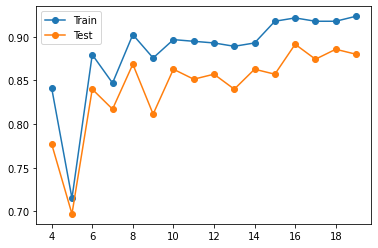

# Layers = 2


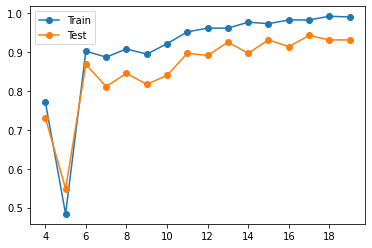

# Layers = 3


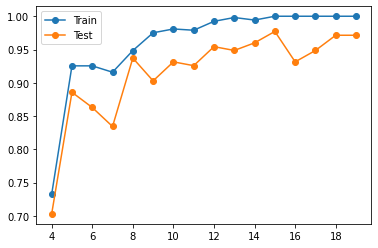

# Layers = 4


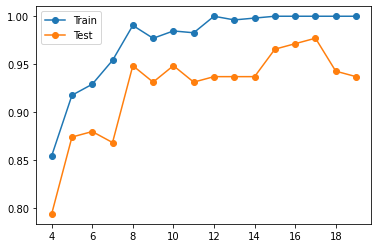

# Layers = 5


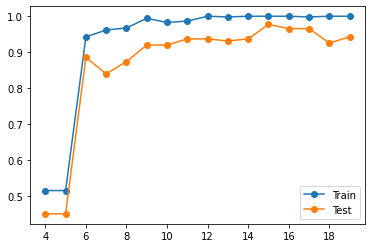

Learn Rate = adaptive
# Layers = 1


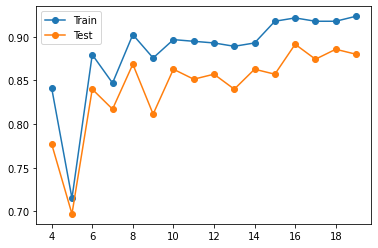

# Layers = 2


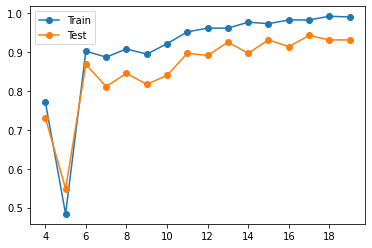

# Layers = 3


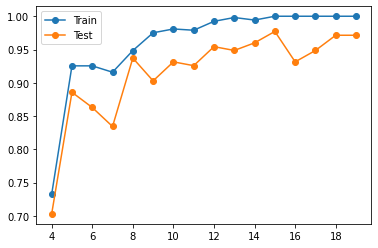

# Layers = 4


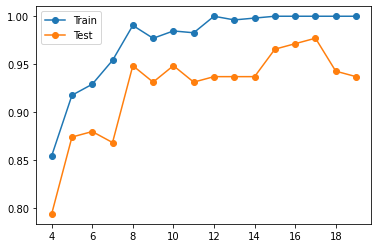

# Layers = 5


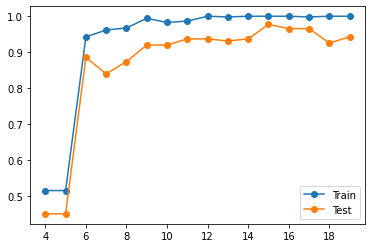

In [30]:
watch_overfit_mlp(x_train, x_test, y_train, y_test)

In [31]:
test_query = """
with districts_short as (
    select id, ratio_urban_inhabitants, avg_salary,
           coalesce(unemployment_96, unemployment_95) as unemployment,
           cast(coalesce(crimes_96, crimes_95) as real) / no_inhabitants as crimes from districts
), t as (
    select account_id, count(*) transaction_count, avg(amount) transaction_avg_amount, min(balance) transaction_min_balance,
           max(balance) transaction_max_balance, avg(balance) transaction_avg_balance
    from transactions
    group by account_id
)
select l.date loan_date, l.amount loan_amount, l.duration loan_duration , l.payments loan_payments,
       a.date account_creation, t.transaction_count, t.transaction_avg_amount, t.transaction_min_balance,
       t.transaction_max_balance, t.transaction_avg_balance,
       d.ratio_urban_inhabitants, d.avg_salary, d.unemployment, d.crimes,
       c2.birthday as client_birthday, l.status as loan_status, l.id as loan_id
from loans l
    left join accounts a on l.account_id = a.id
    left join t on t.account_id = a.id
    left join districts_short d on a.district_id = d.id
left join dispositions d2 on a.id = d2.account_id
left join clients c2 on d2.client_id = c2.id
"""

In [32]:
with sqlite3.connect("./database_test.db") as db_test:
    test_dataset = pd.read_sql_query(sql = test_query, con = db_test)

test_dataset

,loan_date,loan_amount,loan_duration,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,client_birthday,loan_status,loan_id
0,971208,30276,12,2523,960728,164,12113.931098,900.0,119652.7,62991.264634,57.2,9893,4.72,0.025724,620209,None,4962
1,981014,318480,60,5308,970818,116,7571.999138,-1011.2,104761.5,39953.970690,58.4,8547,3.64,0.021827,520826,None,4967
2,980419,110736,48,2307,970808,55,4716.194545,13841.0,55991.1,31383.449091,52.7,8402,3.98,0.021370,400130,None,4968
3,970810,102876,12,8573,960505,118,4844.029661,900.0,60334.7,33057.374576,100.0,10673,5.44,0.056649,420128,None,4986
4,970810,102876,12,8573,960505,118,4844.029661,900.0,60334.7,33057.374576,100.0,10673,5.44,0.056649,360920,None,4986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,971211,155760,24,6490,970112,83,13533.985542,200.0,108538.5,51964.019277,84.7,8705,7.61,0.036322,480731,None,7279
420,970131,67320,36,1870,950920,111,3749.468468,200.0,43949.4,26491.780180,51.4,9307,4.43,0.031794,720126,None,7286
421,981122,317460,60,5291,970711,145,14354.505517,700.0,135890.4,64978.072414,52.0,8187,5.45,0.020797,751120,None,7292
422,980927,39168,24,1632,971015,54,7977.972222,300.0,81495.6,55438.851852,63.4,9920,2.87,0.051159,790222,None,7294


In [33]:
# Everything except loan_duration, loan_status
test_dataset_to_scale = test_dataset[features_to_standardize]

# Scaler
scaler = StandardScaler()
scaled_test_dataset = pd.DataFrame(scaler.fit_transform(test_dataset_to_scale), columns = test_dataset_to_scale.columns)

scaled_test_dataset = scaled_test_dataset.join(test_dataset['loan_id'])
scaled_test_dataset

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,client_birthday,loan_id
0,-0.795474,-1.034956,-0.773125,-0.426303,1.757708,0.600099,0.105567,0.899904,1.402452,-0.541462,0.368137,0.576529,-0.541281,0.400719,4962
1,1.199190,1.338773,0.459283,1.292368,0.678489,-0.384016,-0.791088,0.465534,-0.273321,-0.481317,-0.667457,0.051357,-0.745865,-0.368406,4967
2,1.078159,-0.372265,-0.868709,1.290665,-0.693018,-1.002793,6.176943,-0.957076,-0.896755,-0.767008,-0.779018,0.216689,-0.769879,-1.302471,4968
3,-0.876432,-0.437002,1.904099,-0.464288,0.723456,-0.975094,0.105567,-0.830376,-0.774991,1.603724,0.968258,0.926644,1.082058,-1.147707,4986
4,-0.876432,-0.437002,1.904099,-0.464288,0.723456,-0.975094,0.105567,-0.830376,-0.774991,1.603724,0.968258,0.926644,1.082058,-1.605917,4986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,-0.794864,-0.001435,0.982337,1.172112,-0.063474,0.907787,-0.222843,0.575708,0.600311,0.836870,-0.545894,1.981852,0.014997,-0.678701,7279
420,-1.014549,-0.729851,-1.062088,-2.096941,0.566070,-1.212257,-0.222843,-1.308327,-1.252583,-0.832165,-0.082724,0.435511,-0.222682,1.173976,7286
421,1.221158,1.330372,0.451760,1.274142,1.330517,1.085572,0.011736,1.373551,1.546975,-0.802093,-0.944436,0.931507,-0.799920,1.413838,7292
422,1.181493,-0.961719,-1.167407,1.325924,-0.715502,-0.296053,-0.175928,-0.213122,0.853076,-0.230711,0.388910,-0.323072,0.793836,1.716448,7294


In [35]:
col_names_to_encode = ["loan_duration"]
test_dataset_to_hotencode = test_dataset[col_names_to_encode]

encoder = OneHotEncoder(sparse=False)
res = encoder.fit(test_dataset_to_hotencode)

columns = []
for index, column_name in enumerate(col_names_to_encode):
    columns = columns + [f"is_{column_name}_{val}" for val in res.categories_[index]]

hot_encoded_test_dataset = pd.DataFrame(res.transform(test_dataset_to_hotencode), columns = columns)

hot_encoded_test_dataset


# Recreate train_dataset after preprocessing

pre_processed_test_dataframe = scaled_test_dataset.join(hot_encoded_test_dataset)
pre_processed_test_dataframe = pre_processed_test_dataframe.drop_duplicates()
pre_processed_test_dataframe = pre_processed_test_dataframe.reset_index()
pre_processed_test_dataframe = pre_processed_test_dataframe.drop(['index'], axis=1)

target_features = pre_processed_test_dataframe.drop(['loan_id'], axis=1)
target_ids = pre_processed_test_dataframe.loan_id

In [36]:
rf = RandomForestClassifier(n_estimators=13, random_state = 19)
rf.fit(x_train, y_train)

probabilities = rf.predict_proba(target_features)
positive_probabilities = [row[0] for row in probabilities]

In [15]:
import csv
with open("predictions/v1/random_forest_resampled_preprocessed_outliers_13est.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["Id", "Predicted"])
    writer.writerows(zip(target_ids, positive_probabilities))